# ML in Genomics 
## BiLSTM-3 Training with Protein Profiles
### Team Members:
    1. Hrishikesh Mahajan
    2. Pratik Kamble
    3. Smridhi Bhat
    4. Yash Shekhadar


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Basic Imports
import gzip as gz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
import pickle as pkl

# Keras Imports 
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional
from keras.layers import Dense
from keras.layers import Masking
from keras.regularizers import l2
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Train.npy.gz", "r")
train_raw = np.load(f)
train_data = train_raw.reshape((len(train_raw), 700, 57))
train_x = train_data[:, :, 35:56]
train_y = train_data[:, :, 22:30]

In [4]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Test.npy.gz", "r")
test_raw = np.load(f)
test_data = test_raw.reshape((len(test_raw), 700, 57))
test_x = test_data[:, :, 35:56]
test_y = test_data[:, :, 22:30]

In [5]:
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(700, 21)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',  'mae'])

In [6]:
filepath = '/content/drive/MyDrive/MLG/Model-5/Model-5.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [7]:
history = model.fit(train_x, train_y, epochs=40, validation_data = (test_x, test_y), batch_size=32,callbacks=[checkpoint])

Epoch 1/40
168/168 [==============================] - ETA: 0s - loss: 0.4691 - acc: 0.4350 - mae: 0.1723
Epoch 1: val_loss improved from inf to 0.28828, saving model to /content/drive/MyDrive/MLG/Model-5/Model-5.hdf5
168/168 [==============================] - 114s 407ms/step - loss: 0.4691 - acc: 0.4350 - mae: 0.1723 - val_loss: 0.2883 - val_acc: 0.5635 - val_mae: 0.1425
Epoch 2/40
168/168 [==============================] - ETA: 0s - loss: 0.3457 - acc: 0.6023 - mae: 0.1294
Epoch 2: val_loss improved from 0.28828 to 0.26051, saving model to /content/drive/MyDrive/MLG/Model-5/Model-5.hdf5
168/168 [==============================] - 61s 365ms/step - loss: 0.3457 - acc: 0.6023 - mae: 0.1294 - val_loss: 0.2605 - val_acc: 0.6009 - val_mae: 0.1291
Epoch 3/40
168/168 [==============================] - ETA: 0s - loss: 0.3207 - acc: 0.6322 - mae: 0.1214
Epoch 3: val_loss improved from 0.26051 to 0.25589, saving model to /content/drive/MyDrive/MLG/Model-5/Model-5.hdf5
168/168 [===================

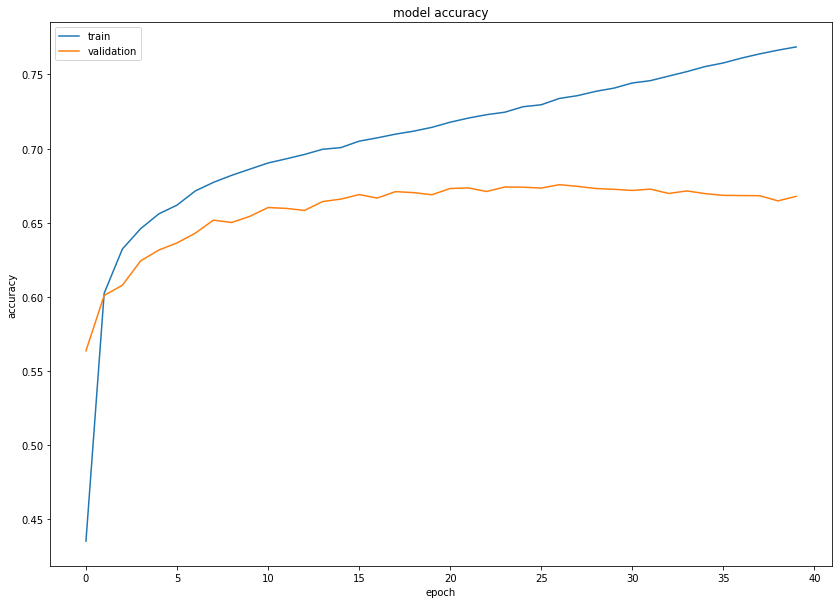

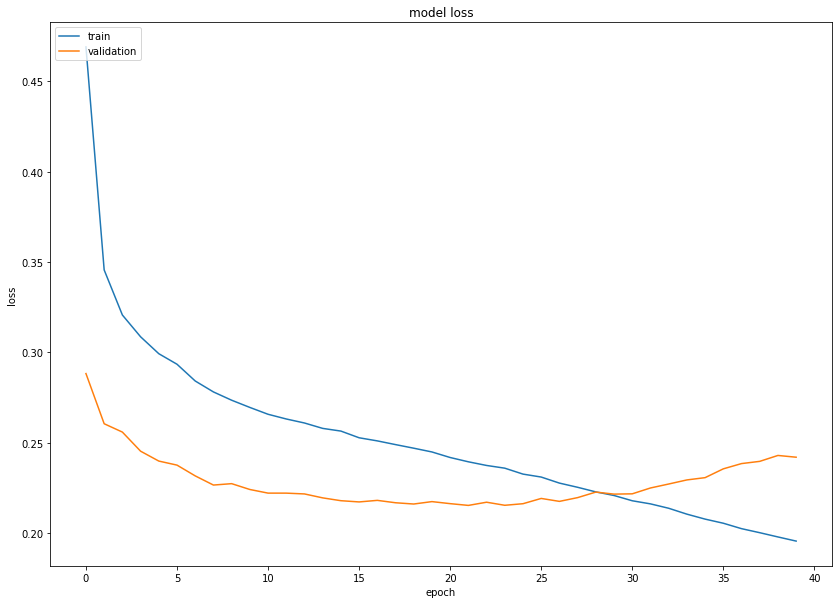

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

# "Accuracy"
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
model.save("/content/drive/MyDrive/MLG/Model-5/D5.h5")
file = open("/content/drive/MyDrive/MLG/Model-5/D5.history", "wb")
pkl.dump(history, file)

INFO:tensorflow:Assets written to: ram://8028b237-1e4e-43e9-aa44-da98450914f2/assets


INFO:tensorflow:Assets written to: ram://8028b237-1e4e-43e9-aa44-da98450914f2/assets


In [10]:
test_pred = model.predict(np.array([test_x[0]]))

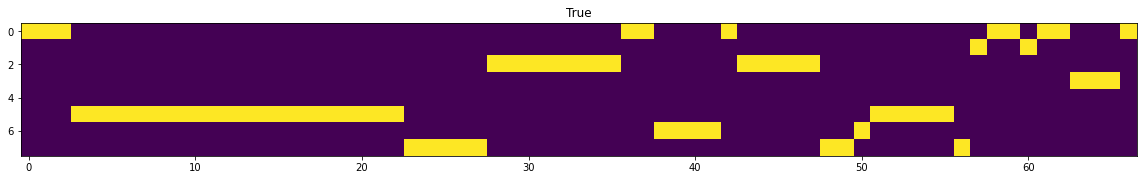

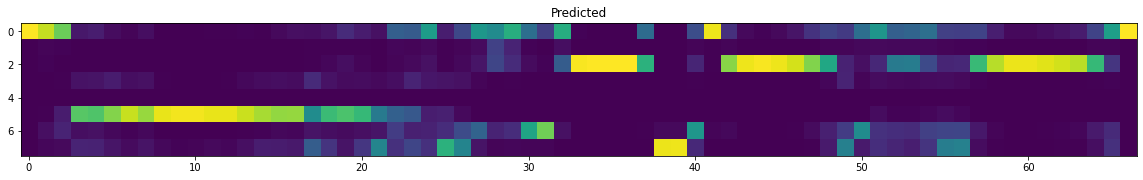

In [11]:
plt.figure(figsize=(20,4))
plt.title("True")
plt.imshow(test_y[0][0:67].T)
plt.figure(figsize=(20,4))
plt.title("Predicted")
plt.imshow(test_pred[0][0:67].T)

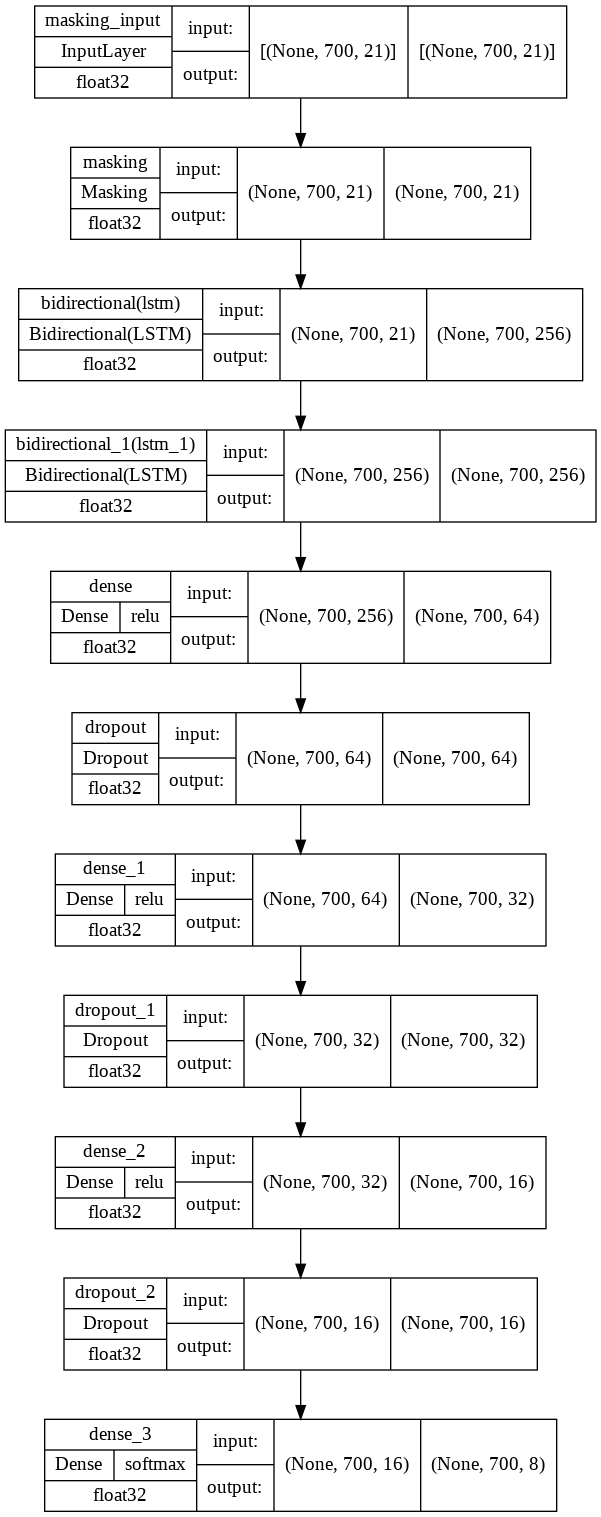

In [12]:
import tensorflow
tensorflow.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

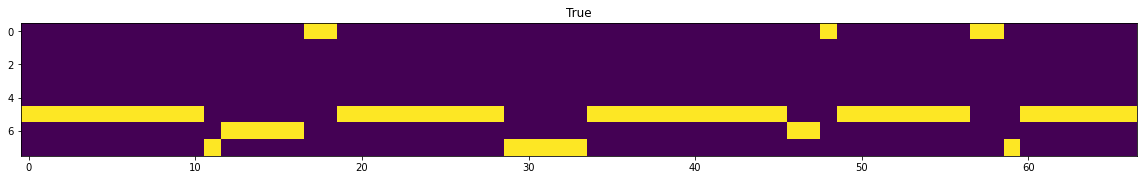

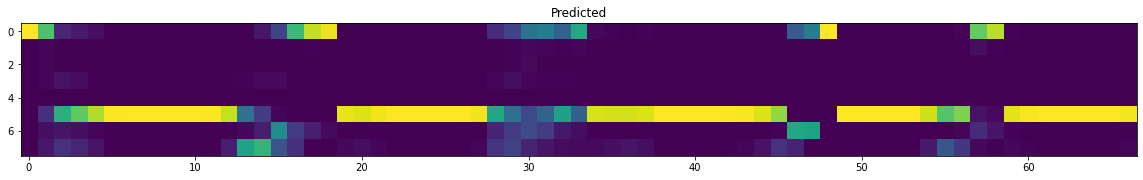

In [17]:
tid = 15
test_pred = model.predict(np.array([test_x[tid]]))
plt.figure(figsize=(20,4))
plt.title("True")
plt.imshow(test_y[tid][0:67].T)
plt.figure(figsize=(20,4))
plt.title("Predicted")
plt.imshow(test_pred[0][0:67].T)